In [44]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
sys.path.append(os.path.abspath('../src'))
from preprocessamento import processamento

In [46]:
df = pd.read_csv("../data/restaurant_customer_satisfaction.csv")

In [47]:
df.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [49]:
df.describe(percentiles=[0, .25, .50, .75]).T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,0%,25%,50%,75%,max
CustomerID,1500.000000,1403.500000,433.157015,654.000000,654.000000,1028.750000,1403.500000,1778.250000,2153.000000
Age,1500.000000,43.832000,14.967157,18.000000,18.000000,31.750000,44.000000,57.000000,69.000000
Income,1500.000000,85921.890000,38183.051749,20012.000000,20012.000000,52444.000000,85811.000000,119159.250000,149875.000000
AverageSpend,1500.000000,105.659004,52.381849,10.306127,10.306127,62.287907,104.626408,148.649330,199.973527
GroupSize,1500.000000,5.035333,2.558864,1.000000,1.000000,3.000000,5.000000,7.000000,9.000000
OnlineReservation,1500.000000,0.296667,0.456941,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
DeliveryOrder,1500.000000,0.405333,0.491120,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
LoyaltyProgramMember,1500.000000,0.480000,0.499766,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
WaitTime,1500.000000,30.163550,17.214184,0.001380,0.001380,15.235423,30.044055,45.285649,59.970762
ServiceRating,1500.000000,3.044000,1.423405,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000


In [50]:
pd.DataFrame(df.isnull().sum()).T.style.background_gradient(cmap='coolwarm')

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
colunas_cat = df.select_dtypes(include=['object']).columns.to_list()
for col in df[colunas_cat]:
    print(f"\nColuna: {col}\n{df[col].value_counts()}")


Coluna: Gender
Gender
Female    759
Male      741
Name: count, dtype: int64

Coluna: VisitFrequency
VisitFrequency
Weekly     606
Monthly    428
Rarely     313
Daily      153
Name: count, dtype: int64

Coluna: PreferredCuisine
PreferredCuisine
Italian     325
Chinese     310
Mexican     299
Indian      296
American    270
Name: count, dtype: int64

Coluna: TimeOfVisit
TimeOfVisit
Breakfast    506
Lunch        502
Dinner       492
Name: count, dtype: int64

Coluna: DiningOccasion
DiningOccasion
Celebration    519
Business       500
Casual         481
Name: count, dtype: int64

Coluna: MealType
MealType
Dine-in     751
Takeaway    749
Name: count, dtype: int64


In [52]:
def contagem_outliers(df):
    colunas_num = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
    outliers_count = {}
    for col in colunas_num:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df[z_scores > 3]
        outliers_count[col] = len(outliers)
    return outliers_count

outliers_count = contagem_outliers(df)
print("Contagem de outliers utilizando Z-Score:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Contagem de outliers utilizando Z-Score:
CustomerID: 0
Age: 0
Income: 0
AverageSpend: 0
GroupSize: 0
OnlineReservation: 0
DeliveryOrder: 0
LoyaltyProgramMember: 0
WaitTime: 0
ServiceRating: 0
FoodRating: 0
AmbianceRating: 0
HighSatisfaction: 0


In [53]:
colunas_num = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("\nQuantidade de outliers em cada coluna numérica utilizando Quartil:")
for col in colunas_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {outliers.shape[0]}")


Quantidade de outliers em cada coluna numérica utilizando Quartil:
CustomerID: 0
Age: 0
Income: 0
AverageSpend: 0
GroupSize: 0
OnlineReservation: 0
DeliveryOrder: 0
LoyaltyProgramMember: 0
WaitTime: 0
ServiceRating: 0
FoodRating: 0
AmbianceRating: 0
HighSatisfaction: 201


In [54]:
data = pd.read_csv("../data/restaurant_customer_satisfaction.csv")

In [55]:
numerico_df = processamento(data)

In [56]:
corr_matrix = numerico_df.corr()
corr_matrix

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
CustomerID,1.000000,-0.047325,0.030891,0.038576,0.013716,0.052244,-0.007375,0.050086,0.003696,-0.000693,-0.028324,0.008600,0.004936,-0.000435,-0.014904,0.045303,0.006604,-0.014443,0.160112
Age,-0.047325,1.000000,-0.016622,-0.033288,0.014338,0.017765,0.022640,-0.001385,-0.003991,0.010442,0.005065,-0.023044,-0.013146,0.014801,-0.020497,-0.000279,0.032616,0.003066,0.035547
Gender,0.030891,-0.016622,1.000000,0.004725,-0.019981,0.003621,-0.055270,-0.011581,-0.056914,-0.036337,-0.016017,0.015092,0.018056,0.022206,0.009715,-0.035239,0.004678,0.050925,0.006678
Income,0.038576,-0.033288,0.004725,1.000000,-0.036813,0.014749,0.024108,-0.001881,0.062892,0.027832,-0.010632,0.001922,0.016125,-0.015756,-0.020136,0.012369,-0.018925,-0.045090,0.081905
VisitFrequency,0.013716,0.014338,-0.019981,-0.036813,1.000000,0.003719,-0.000949,0.008447,0.051347,-0.033241,-0.007328,0.011475,0.022249,0.055331,-0.009486,-0.026433,0.054494,0.001282,0.147058
AverageSpend,0.052244,0.017765,0.003621,0.014749,0.003719,1.000000,-0.016238,0.018888,0.032754,0.000557,0.009480,-0.032448,0.022953,-0.007018,0.040739,0.015676,0.007132,0.009522,0.052716
PreferredCuisine,-0.007375,0.022640,-0.055270,0.024108,-0.000949,-0.016238,1.000000,-0.008140,0.021614,-0.003181,0.025633,-0.016419,-0.011899,0.022701,-0.035896,0.032760,0.008600,0.003628,0.037817
TimeOfVisit,0.050086,-0.001385,-0.011581,-0.001881,0.008447,0.018888,-0.008140,1.000000,-0.007830,0.006686,0.003254,0.003853,-0.000542,0.014266,-0.005437,0.014140,0.013808,-0.004045,-0.007496
GroupSize,0.003696,-0.003991,-0.056914,0.062892,0.051347,0.032754,0.021614,-0.007830,1.000000,-0.013879,0.007576,0.044090,-0.008750,-0.009098,-0.032626,0.035472,0.056249,0.011622,-0.084235
DiningOccasion,-0.000693,0.010442,-0.036337,0.027832,-0.033241,0.000557,-0.003181,0.006686,-0.013879,1.000000,0.018478,0.016733,0.011257,-0.020421,0.018283,-0.015646,-0.021046,-0.020717,0.130822


In [68]:
sns.set_style("darkgrid")

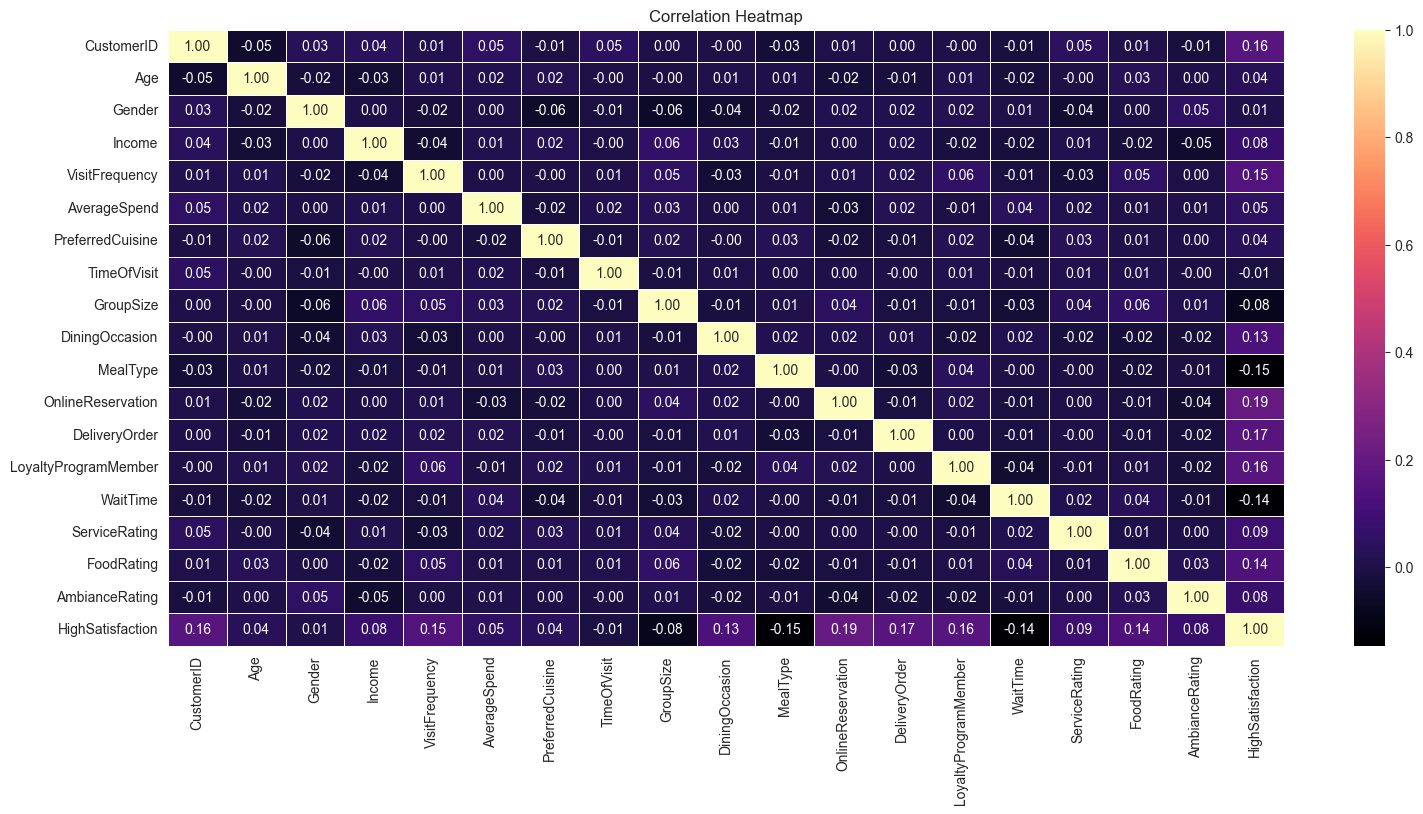

In [63]:
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

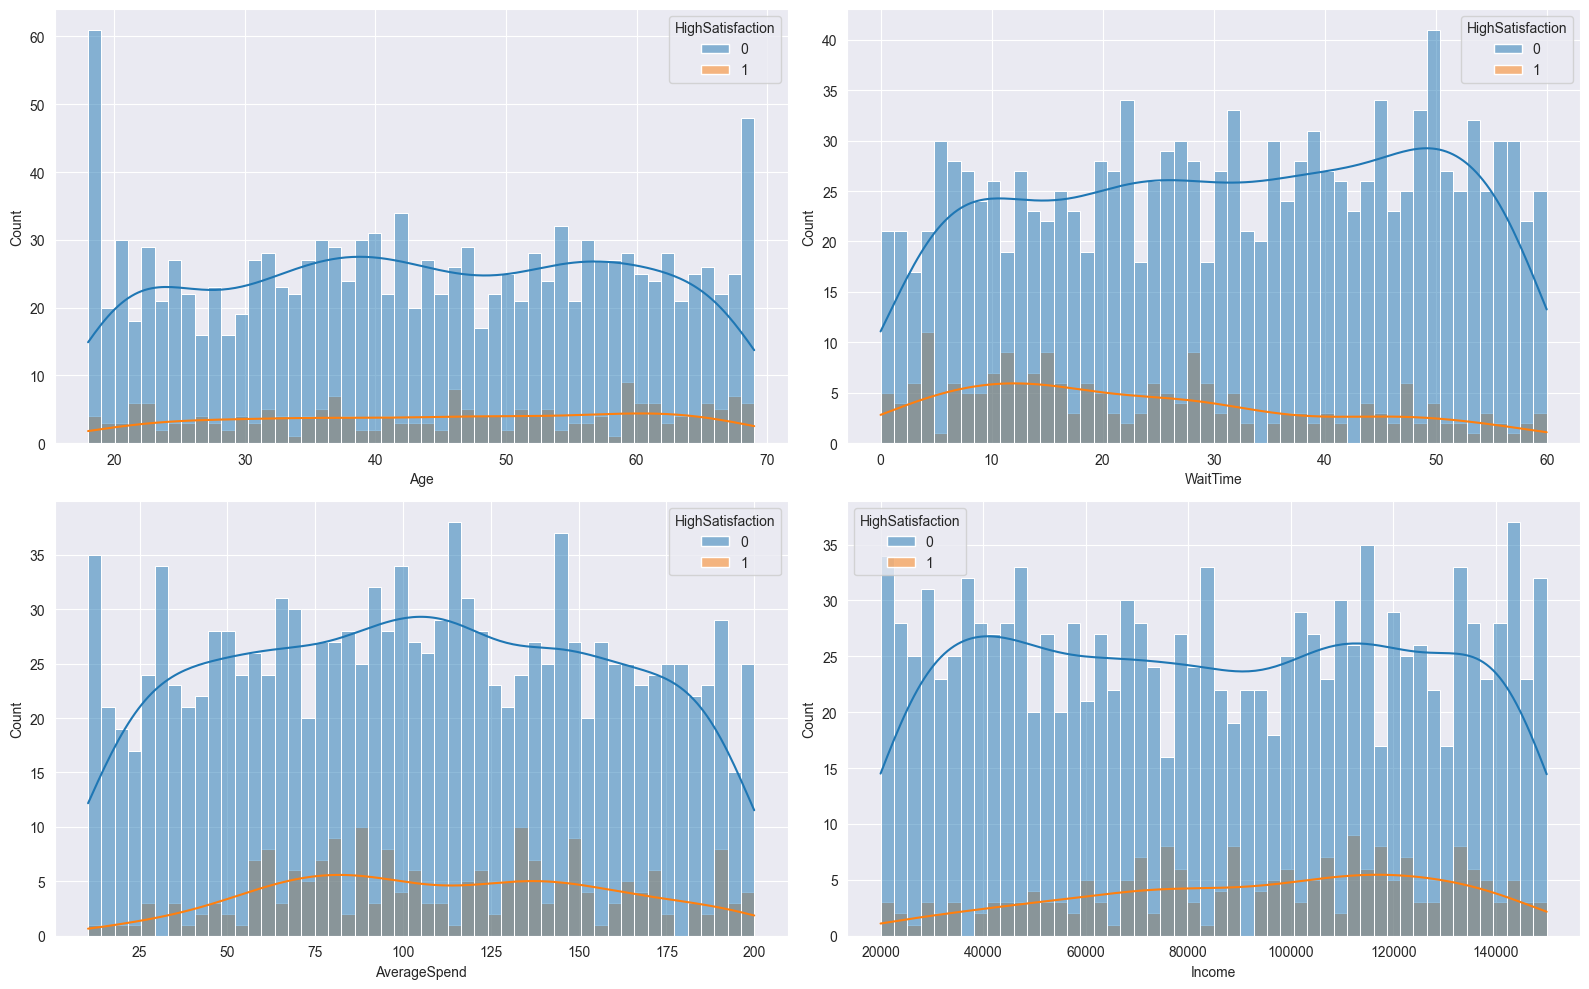

In [69]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 10))

sns.histplot(df, x='Age', bins=50, kde=True, hue='HighSatisfaction', ax=axs[0, 0])
sns.histplot(df, x='WaitTime', bins=50, kde=True, hue='HighSatisfaction', ax=axs[0, 1])
sns.histplot(df, x='AverageSpend', bins=50, kde=True, hue='HighSatisfaction', ax=axs[1, 0])
sns.histplot(df, x='Income', bins=50, kde=True, hue='HighSatisfaction', ax=axs[1, 1])

plt.tight_layout()
plt.show()

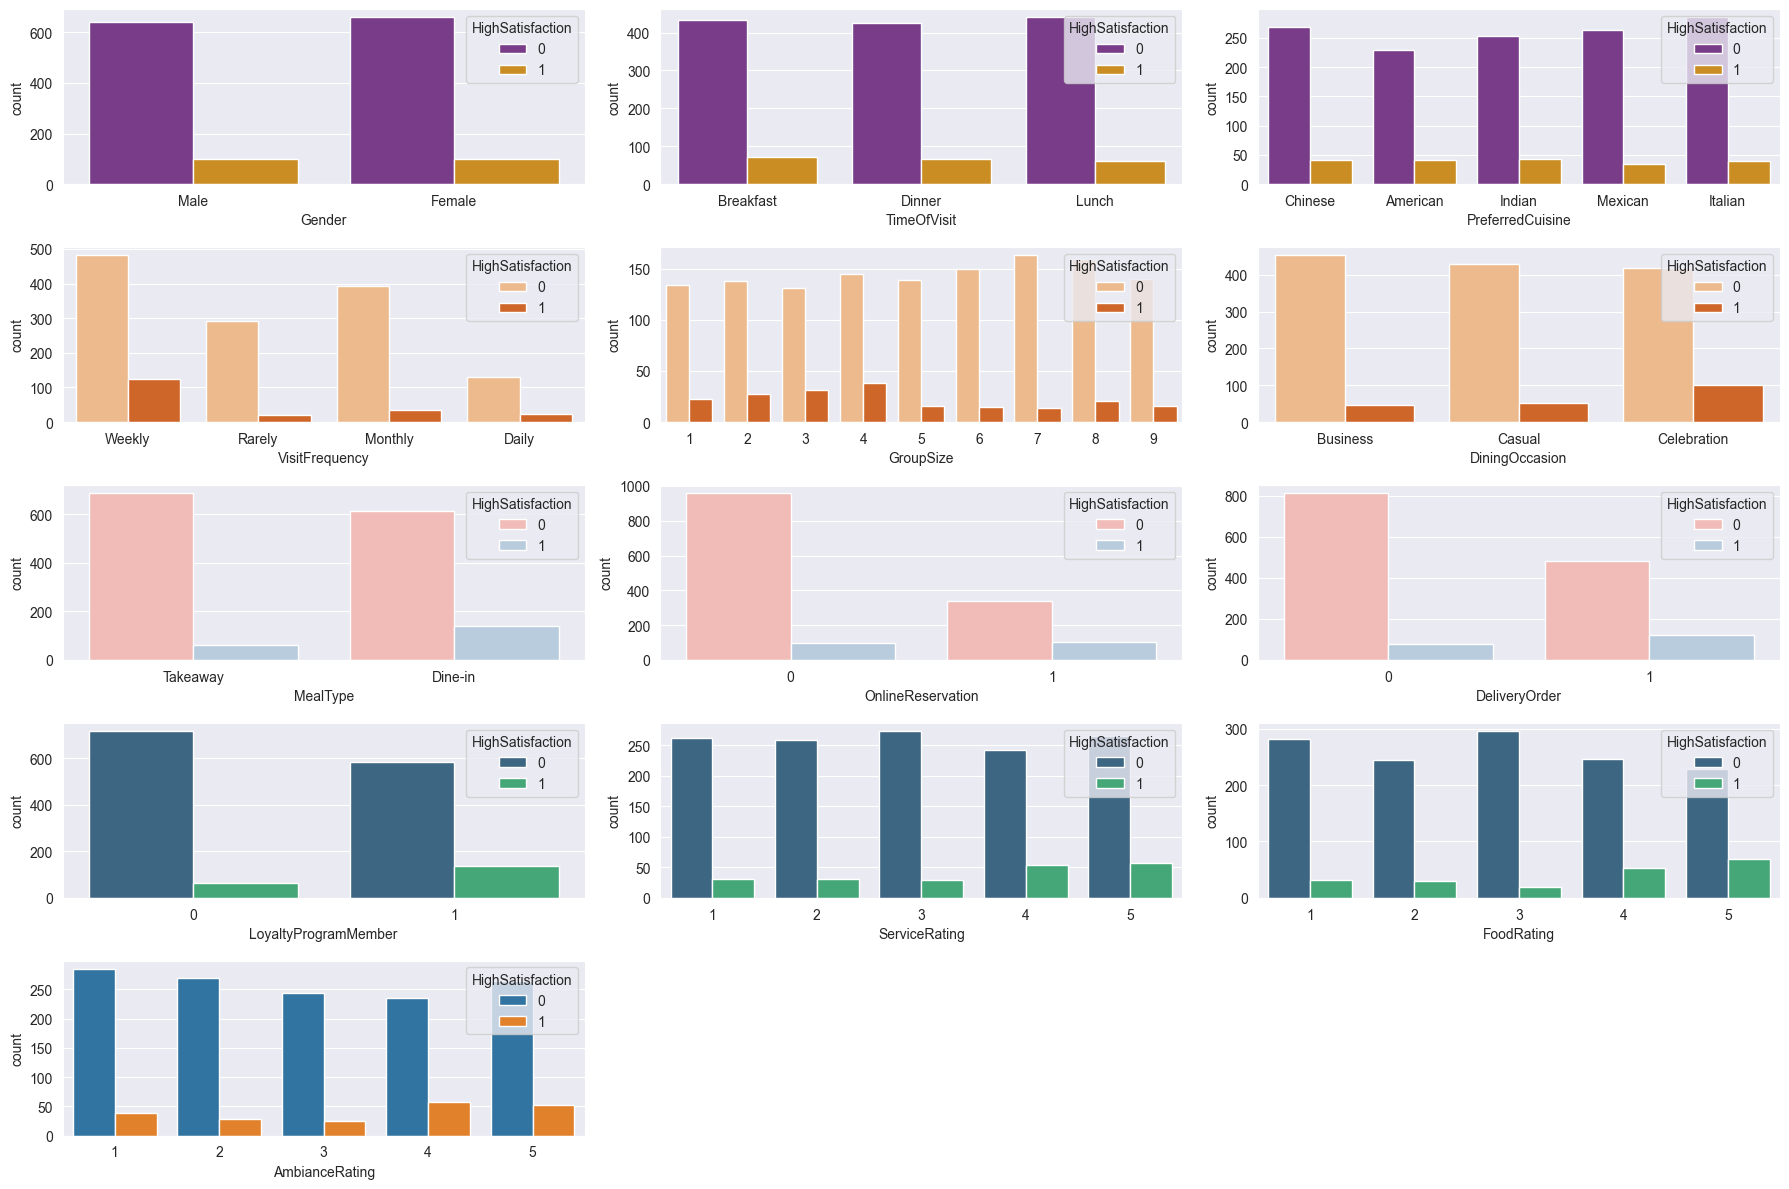

In [100]:
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(18, 12))

sns.countplot(df, x='Gender', hue='HighSatisfaction', stat='count', ax=axs[0, 0], palette='CMRmap')
sns.countplot(df, x='TimeOfVisit', hue='HighSatisfaction', stat='count', ax=axs[0, 1], palette='CMRmap')
sns.countplot(df, x='PreferredCuisine', hue='HighSatisfaction', stat='count', ax=axs[0, 2], palette='CMRmap')

sns.countplot(df, x='VisitFrequency', hue='HighSatisfaction', stat='count', ax=axs[1, 0], palette='Oranges')
sns.countplot(df, x='GroupSize', hue='HighSatisfaction', stat='count', ax=axs[1, 1], palette='Oranges')
sns.countplot(df, x='DiningOccasion', hue='HighSatisfaction', stat='count', ax=axs[1, 2], palette='Oranges')

sns.countplot(df, x='MealType', hue='HighSatisfaction', stat='count', ax=axs[2, 0], palette='Pastel1')
sns.countplot(df, x='OnlineReservation', hue='HighSatisfaction', stat='count', ax=axs[2, 1], palette='Pastel1')
sns.countplot(df, x='DeliveryOrder', hue='HighSatisfaction', stat='count', ax=axs[2, 2], palette='Pastel1')

sns.countplot(df, x='LoyaltyProgramMember', hue='HighSatisfaction', stat='count', ax=axs[3, 0], palette='viridis')
sns.countplot(df, x='ServiceRating', hue='HighSatisfaction', stat='count', ax=axs[3, 1], palette='viridis')
sns.countplot(df, x='FoodRating', hue='HighSatisfaction', stat='count', ax=axs[3, 2], palette='viridis')

sns.countplot(df, x='AmbianceRating', hue='HighSatisfaction', stat='count', ax=axs[4, 0])

fig.delaxes(axs[4, 1])
fig.delaxes(axs[4, 2])
plt.tight_layout()
plt.show()

In [104]:
colunas_count = ['Gender', 'TimeOfVisit', 'PreferredCuisine', 'VisitFrequency', 'GroupSize', 'DiningOccasion', 'MealType', 'OnlineReservation', 
                 'DeliveryOrder', 'LoyaltyProgramMember', 'ServiceRating', 'FoodRating', 'AmbianceRating']

for i in colunas_count:
    print(f"Coluna (Alta Satisfação Positiva): {i}\n{df[df['HighSatisfaction'] == 1][i].value_counts(normalize=True)}\n")
    print(f"Coluna (Alta Satisfação Negativa): {i}\n{df[df['HighSatisfaction'] == 0][i].value_counts(normalize=True)}\n")

Coluna (Alta Satisfação Positiva): Gender
Gender
Male      0.502488
Female    0.497512
Name: proportion, dtype: float64

Coluna (Alta Satisfação Negativa): Gender
Gender
Female    0.507313
Male      0.492687
Name: proportion, dtype: float64

Coluna (Alta Satisfação Positiva): TimeOfVisit
TimeOfVisit
Breakfast    0.358209
Dinner       0.333333
Lunch        0.308458
Name: proportion, dtype: float64

Coluna (Alta Satisfação Negativa): TimeOfVisit
TimeOfVisit
Lunch        0.338722
Breakfast    0.334103
Dinner       0.327175
Name: proportion, dtype: float64

Coluna (Alta Satisfação Positiva): PreferredCuisine
PreferredCuisine
Indian      0.213930
Chinese     0.208955
American    0.203980
Italian     0.199005
Mexican     0.174129
Name: proportion, dtype: float64

Coluna (Alta Satisfação Negativa): PreferredCuisine
PreferredCuisine
Italian     0.219400
Chinese     0.206313
Mexican     0.203233
Indian      0.194765
American    0.176289
Name: proportion, dtype: float64

Coluna (Alta Satisfação 

In [109]:
val_numericos = ['Age', 'Income', 'AverageSpend', 'WaitTime']
val_categoricos = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType']

In [116]:
def info_agg(coluna1, coluna2):
    return df.groupby(coluna1)[coluna2].agg(['mean', 'median', 'min', 'max'])

In [128]:
for cat_col in val_categoricos:
    for num_col in val_numericos:
        print(f"Aggregations for {cat_col} and {num_col}:")
        result = info_agg(cat_col, num_col)
        print(f"{result}\n")
        print()

Aggregations for Gender and Age:
             mean  median  min  max
Gender                             
Female  44.077734    44.0   18   69
Male    43.580297    44.0   18   69


Aggregations for Gender and Income:
                mean   median    min     max
Gender                                      
Female  85743.695652  84915.0  20012  149856
Male    86104.412955  87107.0  20093  149875


Aggregations for Gender and AverageSpend:
              mean      median        min         max
Gender                                               
Female  105.471643  105.252680  10.787862  199.796650
Male    105.850916  103.994846  10.306127  199.973527


Aggregations for Gender and WaitTime:
             mean     median       min        max
Gender                                           
Female  29.998366  29.834067  0.020494  59.862386
Male    30.332746  30.295858  0.001380  59.970762


Aggregations for VisitFrequency and Age:
                     mean  median  min  max
VisitFrequency    